#PhlyGreen Tutorial 

Import packages

In [113]:
import sys
sys.path.insert(0,'../')
import PhlyGreen as pg
import numpy as np
import matplotlib.pyplot as plt

Create instances of subsystems. Each one of those requires an Aircraft object as argument. By passing (None) as argument, we are creating empty objects (for the moment).

In [114]:
powertrain = pg.Systems.Powertrain.Powertrain(None)
structures = pg.Systems.Structures.Structures(None)
aerodynamics = pg.Systems.Aerodynamics.Aerodynamics(None)
performance = pg.Performance.Performance(None)
mission = pg.Mission.Mission(None)
weight = pg.Weight.Weight(None)
constraint = pg.Constraint.Constraint(None)
welltowake = pg.WellToWake.WellToWake(None)
battery = pg.Systems.Battery.Battery(None)
climateimpact = pg.ClimateImpact.ClimateImpact(None)

Create instance of Aircraft object.

In [115]:
myaircraft = pg.Aircraft(powertrain, structures, aerodynamics, performance, mission, weight, constraint, welltowake, battery, climateimpact)

Create the connections with its subsystems.

In [116]:
powertrain.aircraft = myaircraft
structures.aircraft = myaircraft
aerodynamics.aircraft = myaircraft
mission.aircraft = myaircraft
performance.aircraft = myaircraft
weight.aircraft = myaircraft
constraint.aircraft = myaircraft
welltowake.aircraft = myaircraft
battery.aircraft = myaircraft
climateimpact.aircraft = myaircraft

Define input dictionaries

In [117]:
ConstraintsInput = {'DISA': 0.,
                    'Cruise': {'Speed': 0.5, 'Speed Type':'Mach', 'Beta': 0.95, 'Altitude': 8000.},
                    'AEO Climb': {'Speed': 210, 'Speed Type':'KCAS', 'Beta': 0.97, 'Altitude': 6000., 'ROC': 5},
                    'OEI Climb': {'Speed': 1.2*34.5, 'Speed Type': 'TAS', 'Beta': 1., 'Altitude': 0., 'Climb Gradient': 0.021},
                    'Take Off': {'Speed': 90, 'Speed Type': 'TAS', 'Beta': 1., 'Altitude': 100., 'kTO': 1.2, 'sTO': 950},
                    'Landing':{'Speed': 59., 'Speed Type': 'TAS', 'Altitude': 500.},
                    'Turn':{'Speed': 210, 'Speed Type': 'KCAS', 'Beta': 0.9, 'Altitude': 5000, 'Load Factor': 1.1},
                    'Ceiling':{'Speed': 0.5, 'Beta': 0.8, 'Altitude': 9500, 'HT': 0.5},
                    'Acceleration':{'Mach 1': 0.3, 'Mach 2':0.4, 'DT': 180, 'Altitude': 6000, 'Beta': 0.9}}

In [118]:
MissionInput = {'Range Mission': 750,  #nautical miles
                'Range Diversion': 220,  #nautical miles
                'Beta start': 0.97,
                'Payload Weight': 4560,  #Kg
                'Crew Weight': 500}  #Kg

In [119]:
MissionStages = {'Takeoff': {'Supplied Power Ratio':{'phi': 0.}},
                'Climb1': {'type': 'ConstantRateClimb', 'input': {'CB': 0.16, 'Speed': 77, 'StartAltitude': 100, 'EndAltitude': 1500}, 'Supplied Power Ratio':{'phi_start': 0, 'phi_end':0}},
                 'Climb2': {'type': 'ConstantRateClimb', 'input': {'CB': 0.08, 'Speed': 120, 'StartAltitude': 1500, 'EndAltitude': 4500}, 'Supplied Power Ratio':{'phi_start': 0, 'phi_end':0 }},
                 'Climb3': {'type': 'ConstantRateClimb', 'input': {'CB': 0.07, 'Speed': 125, 'StartAltitude': 4500, 'EndAltitude': 8000}, 'Supplied Power Ratio':{'phi_start': 0, 'phi_end':0.2 }},
                 'Cruise': {'type': 'ConstantMachCruise', 'input':{ 'Mach': 0.4, 'Altitude': 8000}, 'Supplied Power Ratio':{'phi_start': 0.1, 'phi_end':0.}},
                 'Descent1': {'type': 'ConstantRateDescent', 'input':{'CB': -0.05, 'Speed': 90, 'StartAltitude': 8000, 'EndAltitude': 200}, 'Supplied Power Ratio':{'phi_start': 0.0, 'phi_end':0.0 }}}

DiversionStages = {'Climb1': {'type': 'ConstantRateClimb', 'input': {'CB': 0.08, 'Speed': 110, 'StartAltitude': 200, 'EndAltitude': 3100}, 'Supplied Power Ratio':{'phi_start': 0.0, 'phi_end':0.0 }},
                 'Cruise': {'type': 'ConstantMachCruise', 'input':{ 'Mach': 0.35, 'Altitude': 3100}, 'Supplied Power Ratio':{'phi_start': 0.0, 'phi_end':0.0}},
                 'Descent1': {'type': 'ConstantRateDescent', 'input':{'CB': -0.04, 'Speed': 90, 'StartAltitude': 3100, 'EndAltitude': 200}, 'Supplied Power Ratio':{'phi_start': 0.0, 'phi_end':0.0 }}}


In [120]:
EnergyInput = {'Ef': 43.5*10**6,
                   'Contingency Fuel': 130,
                   'Ebat': 700 * 3600,
                   'pbat': 1000,
                   'Eta Gas Turbine': 0.22,
                   'Eta Gearbox': 0.96,
                   'Eta Propulsive': 0.9,
                   'Eta Electric Motor 1': 0.96,    #for serial config
                   'Eta Electric Motor 2': 0.96,    #for serial config
                   'Eta Electric Motor': 0.98,      #for parallel config
                   'Eta PMAD': 0.99,
                   'Specific Power Powertrain': [3900,7700],
                   'Specific Power PMAD': [2200,2200,2200],
                   'PowertoWeight Battery': 35, 
                   'PowertoWeight Powertrain': [150,33],
                   'PowertoWeight PMAD': 0
                   }

In [121]:
CellInput = {
    'Class': "II",
    'Model':'Finger-Cell-Thermal',
    'SpecificPower': 8000,
    'SpecificEnergy': 1500,
    'Minimum SOC': 0.2,
    'Pack Voltage':800,
    'Initial temperature': 25,
    'Max operative temperature':50,
    'Ebat': 1000 * 3600, # PhlyGreen uses this input only if Class == 'I'
    'pbat': 1000
    }

In [122]:
AerodynamicsInput = {'AnalyticPolar': {'type': 'Quadratic', 'input': {'AR': 11, 'e_osw': 0.8}},
                    'Take Off Cl': 1.9,
                     'Landing Cl': 1.9,
                     'Minimum Cl': 0.20,
                     'Cd0': 0.017}


In [123]:
WellToTankInput = {'Eta Charge': 0.95,
                   'Eta Grid': 1.,
                   'Eta Extraction': 1.,
                   'Eta Production': 1.,
                   'Eta Transportation': 0.25}

ClimateImpactInput = {'H': 100, 'N':1.6e7, 'Y':30, 'EINOx_model':'Filippone', 'WTW_CO2': 8.30e-3, 'Grid_CO2': 9.36e-2}

Import input dictionaries

In [124]:
myaircraft.ConstraintsInput = ConstraintsInput
myaircraft.AerodynamicsInput = AerodynamicsInput
myaircraft.MissionInput = MissionInput
myaircraft.MissionStages = MissionStages
myaircraft.DiversionStages = DiversionStages
myaircraft.EnergyInput = EnergyInput
myaircraft.CellInput = CellInput
myaircraft.WellToTankInput = WellToTankInput
myaircraft.ClimateImpactInput = ClimateImpactInput

Set aircraft power configuration

In [125]:
myaircraft.Configuration = 'Hybrid'
myaircraft.HybridType = 'Parallel'
myaircraft.AircraftType = 'ATR'

Set inputs

In [126]:
# Initialize Constraint Analysis
myaircraft.constraint.SetInput()

# Initialize Mission profile and Analysis
myaircraft.mission.InitializeProfile()
myaircraft.mission.SetInput()

# Initialize Aerodynamics subsystem
myaircraft.aerodynamics.SetInput()

# Initialize Powertrain
myaircraft.powertrain.SetInput()

# Initialize Weight Estimator
myaircraft.weight.Class = 'I'

myaircraft.weight.SetInput()

#Initialize Battery Configurator
myaircraft.battery.SetInput()

#Initialized Well to Tank
myaircraft.welltowake.SetInput()

# Initialize Climate Impace Estimator
myaircraft.climateimpact.SetInput()

Either run the Constraint Analysis....

In [127]:
myaircraft.constraint.FindDesignPoint()
print('----------------------------------------')
print('Design W/S: ',myaircraft.DesignWTOoS)
print('Design P/W: ',myaircraft.DesignPW)
print('----------------------------------------')

----------------------------------------
Design W/S:  3293.8228228228227
Design P/W:  194.90567908431782
----------------------------------------


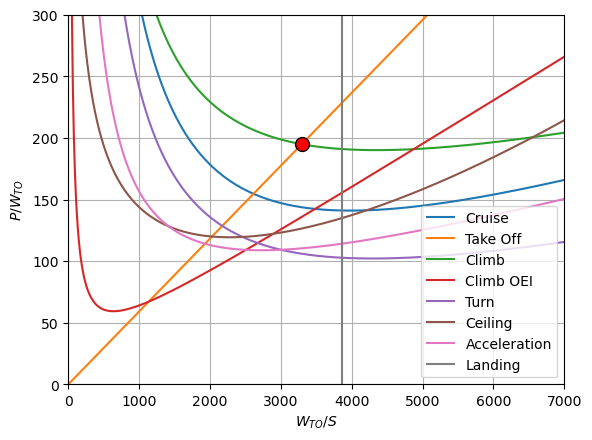

In [128]:
plt.plot(myaircraft.constraint.WTOoS,myaircraft.constraint.PWCruise, label='Cruise')
plt.plot(myaircraft.constraint.WTOoS,myaircraft.constraint.PWTakeOff, label='Take Off')
plt.plot(myaircraft.constraint.WTOoS,myaircraft.constraint.PWAEOClimb, label='Climb')
plt.plot(myaircraft.constraint.WTOoS,myaircraft.constraint.PWOEIClimb, label='Climb OEI')
plt.plot(myaircraft.constraint.WTOoS,myaircraft.constraint.PWTurn, label='Turn')
plt.plot(myaircraft.constraint.WTOoS,myaircraft.constraint.PWCeiling, label='Ceiling')
plt.plot(myaircraft.constraint.WTOoS,myaircraft.constraint.PWAcceleration, label='Acceleration')
plt.plot(myaircraft.constraint.WTOoSLanding,myaircraft. constraint.PWLanding, label='Landing')
plt.plot(myaircraft.DesignWTOoS, myaircraft.DesignPW, marker='o', markersize = 10, markerfacecolor = 'red', markeredgecolor = 'black')
# plt.plot(performance.WTOoSTorenbeek, performance.PWTorenbeek, label='Torenbeek')
plt.ylim([0, 300])
plt.xlim([0, 7000])
plt.legend()
plt.grid(visible=True)
plt.xlabel('$W_{TO}/S$')
plt.ylabel('$P/W_{TO}$')
plt.show()

... or assign a wing loading

In [129]:
# myaircraft.DesignWTOoS = 3323

Run Mission analysis to define the aircraft's masses

In [130]:
myaircraft.weight.WeightEstimation()

max=24 and min=23
Optimal n 24
max=139 and min=138
Optimal n 139
max=46 and min=45
Optimal n 46
max=47 and min=46
Optimal n 47


KeyboardInterrupt: 

Wing surface can be readily estimated as S = WTO/(WTO/S)

In [ ]:
myaircraft.WingSurface = myaircraft.weight.WTO / myaircraft.DesignWTOoS * 9.81

if (myaircraft.Configuration == 'Hybrid' and WellToTankInput is not None):
    myaircraft.welltowake.EvaluateSource()

A summary of the preliminary design:

In [ ]:
myaircraft.Print_Aircraft_Design_Summary()

Fuel mass (trip + altn + loiter): 1838.6 [Kg]
Block Fuel mass:                  1968.6 [Kg]
Battery mass:                     634.0 [Kg]
Structure:                        11159.8 [Kg]
Powertrain mass:                  1408.6 [Kg]
Empty Weight:                     13702.3 [Kg]
Zero Fuel Weight:                 18262.3 [Kg]
----------------------------------------
Takeoff Weight:                   20230.9 [Kg]
 
Source Energy:                    322894.4 [MJ]
Psi:                              0.0 [-]
 
Wing Surface:                     60.3 [m^2]
 
TakeOff engine shaft peak power:  4563.4 [KW]
CLB/CRZ engine shaft peak power:  3760.1 [KW] @ 1503.7 [m]
 
Sizing phase for thermal powertrain:  Takeoff peak power
Thermal powertrain rating shaft power SLS rating: 4563.4 [kW]
 
-------------Battery Specs-------------
Battery Pack Energy:               951.0 [kWh]
Battery Pack Max Power:            5099.9 [kW]
Battery Pack Specific Energy:      1500.0 [Wh/kg]
Battery Pack Specific Power:       

Some plots:

In [ ]:
myaircraft.MissionType = 'Continue'
myaircraft.climateimpact.calculate_mission_emissions()
print(myaircraft.climateimpact.mission_emissions)

myaircraft.climateimpact.ATR()


{'co2': 6753.142633064828, 'h2o': 2316.576956765395, 'so4': 0.3677106280579992, 'soot': 0.07354212561159984, 'nox': 18.89624371572677}


0.003035351628582745

In [ ]:
times = np.array([])
Ef    = np.array([])
Ebat  = np.array([])
beta  = np.array([])
soc   = np.array([])
for array in mission.integral_solution:
    times = np.concatenate([times, array.t])
    Ef    = np.concatenate([Ef   , array.y[0]])
    Ebat  = np.concatenate([Ebat , array.y[1]])
    beta  = np.concatenate([beta , array.y[2]])


toplot = np.array(mission.plottingVars)
soc   = toplot[:, 1]
v_oc  = toplot[:, 2]
v_out = toplot[:, 3]
curr  = toplot[:, 4]
temp  = toplot[:, 5]
atemp = toplot[:, 6]
alt   = toplot[:, 7]

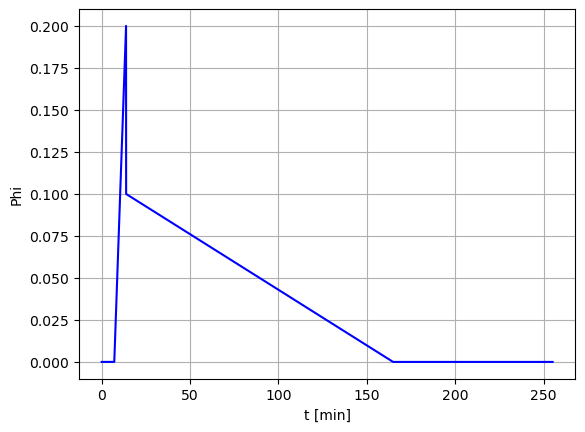

In [ ]:
plt.plot(times/60,[mission.profile.SuppliedPowerRatio(t) for t in times], 'b')
#plt.plot(myaircraft.mission.profile.Breaks,np.ones(6)*0.05, '*')
plt.grid(visible=True)
plt.xlabel('t [min]')
plt.ylabel('Phi')
plt.show()

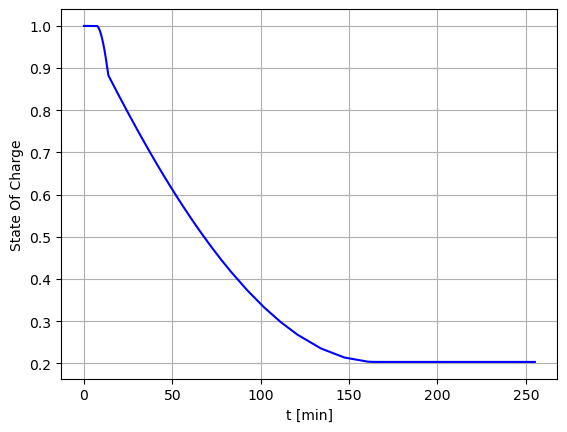

In [ ]:
plt.plot(times/60,soc, 'b')
plt.grid(visible=True)
plt.xlabel('t [min]')
plt.ylabel('State Of Charge')
plt.show()

Takeoff propulsive power

In [ ]:
myaircraft.performance.TakeOff(myaircraft.DesignWTOoS,myaircraft.constraint.TakeOffConstraints['Beta'], myaircraft.constraint.TakeOffConstraints['Altitude'],myaircraft.constraint.TakeOffConstraints['kTO'], myaircraft.constraint.TakeOffConstraints['sTO'], myaircraft.constraint.DISA, myaircraft.constraint.TakeOffConstraints['Speed'], myaircraft.constraint.TakeOffConstraints['Speed Type'])

194.88837279163596

Maximum mission Propusive Power over Takeoff Mass

In [ ]:
max([myaircraft.performance.PoWTO(myaircraft.DesignWTOoS,beta[t],myaircraft.mission.profile.PowerExcess(times[t]),1,myaircraft.mission.profile.Altitude(times[t]),myaircraft.mission.DISA,myaircraft.mission.profile.Velocity(times[t]),'TAS') for t in range(len(times))])

160.58033063213054

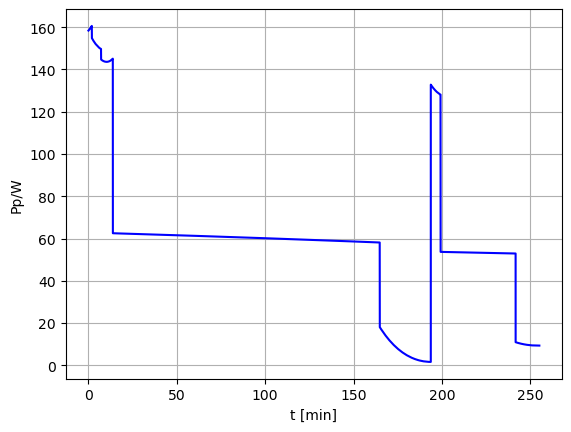

In [ ]:
plt.plot(times/60,[myaircraft.performance.PoWTO(myaircraft.DesignWTOoS,beta[t],myaircraft.mission.profile.PowerExcess(times[t]),1,myaircraft.mission.profile.Altitude(times[t]),myaircraft.mission.DISA,myaircraft.mission.profile.Velocity(times[t]),'TAS') for t in range(len(times))], 'b')
plt.grid(visible=True)
plt.xlabel('t [min]')
plt.ylabel('Pp/W')
plt.show()

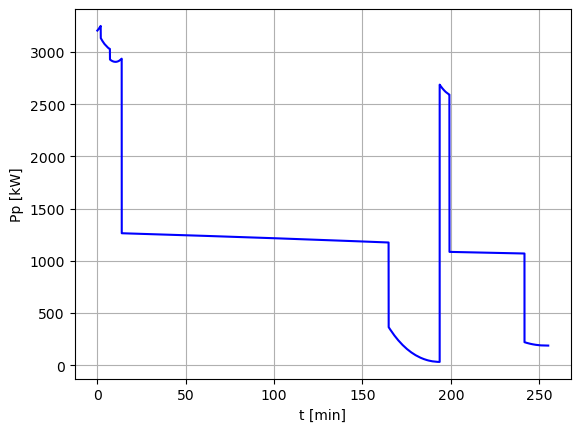

In [ ]:
plt.plot(times/60,[(myaircraft.weight.WTO/1000) * myaircraft.performance.PoWTO(myaircraft.DesignWTOoS,beta[t],myaircraft.mission.profile.PowerExcess(times[t]),1,myaircraft.mission.profile.Altitude(times[t]),myaircraft.mission.DISA,myaircraft.mission.profile.Velocity(times[t]),'TAS') for t in range(len(times))], 'b')
plt.grid(visible=True)
plt.xlabel('t [min]')
plt.ylabel('Pp [kW]')
plt.show()

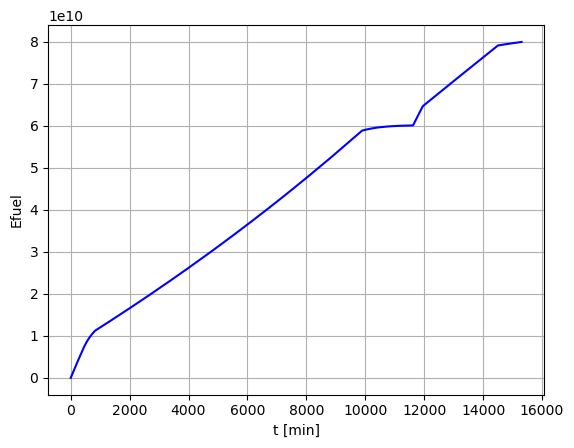

In [ ]:
plt.plot(times,Ef, 'b')
#plt.plot(myaircraft.mission.profile.Breaks,np.ones(6)*0.05, '*')
plt.grid(visible=True)
plt.xlabel('t [min]')
plt.ylabel('Efuel')
plt.show()

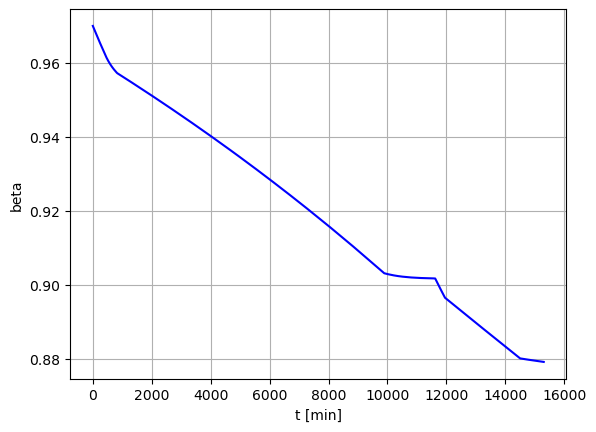

In [ ]:
plt.plot(times,beta, 'b')
#plt.plot(myaircraft.mission.profile.Breaks,np.ones(6)*0.05, '*')
plt.grid(visible=True)
plt.xlabel('t [min]')
plt.ylabel('beta')
plt.show()

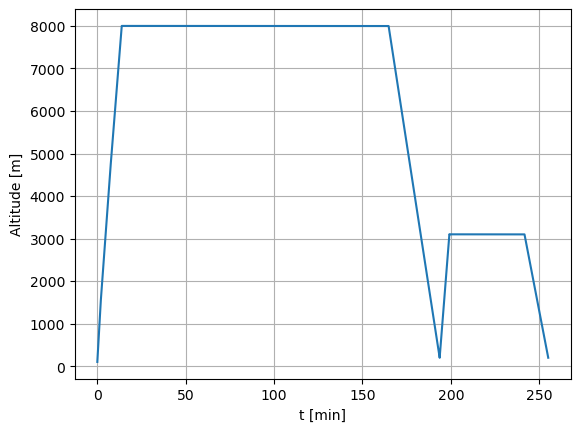

In [ ]:
plt.plot(times/60,mission.profile.Altitude(times))
plt.grid(visible=True)
plt.xlabel('t [min]')
plt.ylabel('Altitude [m]')
plt.show()


TEST OFF-DESIGN MISSION

In [ ]:
from scipy.optimize import brenth 

In [ ]:
maxFuelCapacity = 4000 #Kg (4000 + final reserve)
MTOW = myaircraft.weight.WTO #Kg
OEW = myaircraft.weight.WPT + myaircraft.weight.WStructure + myaircraft.weight.WCrew + myaircraft.weight.final_reserve #Kg 
MZFW =OEW + myaircraft.weight.WPayload #Kg 
WPayload = 4560 #Kg
wfuel = myaircraft.weight.Wf
wbattery = myaircraft.weight.WBat
batteryEnergy = myaircraft.mission.EBat[-1]/(1-myaircraft.battery.SOC_min)
batteryPower = max(myaircraft.mission.TO_PBat,myaircraft.mission.Max_PBat)
designRange = 750 #nm

In [ ]:
wbattery

634.03

In [ ]:
batteryPower

1836166.3308132824

In [ ]:
batteryEnergy

3546071628.2639027

In [ ]:
wfuel

1838.553140289996

In [ ]:
def funcOffD(Wf, WPayload):
     print(f"Trying Wf = {Wf:.6f}")
     run = myaircraft.mission.EvaluateMission(OEW + WPayload+ Wf + wbattery)
     newfuel = run[0]/myaircraft.weight.ef
     if newfuel == 0: 
          print(run[1])
          return np.nan
     result = Wf - newfuel
     print(f"               -> funcOffD = {result:.6f}")
     return result

In [142]:
newmission = pg.Mission.Mission(myaircraft)
myaircraft.mission = newmission

newrange = 250

MissionInput = {'Range Mission': newrange,  #nautical miles
                'Range Diversion': 220,  #nautical miles
                'Beta start': 0.985,
                'Payload Weight': 4560,  #Kg
                'Crew Weight': 500}  #Kg

MissionStages = {'Takeoff': {'Supplied Power Ratio':{'phi': 0.0}},
                 'Climb1': {'type': 'ConstantRateClimb', 'input': {'CB': 0.12, 'Speed': 77, 'StartAltitude': 100, 'EndAltitude': 1500}, 'Supplied Power Ratio':{'phi_start': 0.2, 'phi_end':0.2 }},
                 'Climb2': {'type': 'ConstantRateClimb', 'input': {'CB': 0.06, 'Speed': 110, 'StartAltitude': 1500, 'EndAltitude': 4500}, 'Supplied Power Ratio':{'phi_start': 0.2, 'phi_end':0.2 }},
                 'Climb3': {'type': 'ConstantRateClimb', 'input': {'CB': 0.05, 'Speed': 110, 'StartAltitude': 4500, 'EndAltitude': 6000}, 'Supplied Power Ratio':{'phi_start': 0.2, 'phi_end':0.2}},
                 'Cruise': {'type': 'ConstantMachCruise', 'input':{ 'Mach': 0.45, 'Altitude': 6000}, 'Supplied Power Ratio':{'phi_start': 0.2, 'phi_end':0.1}},
                 'Descent1': {'type': 'ConstantRateDescent', 'input':{'CB': -0.05, 'Speed': 90, 'StartAltitude': 6000, 'EndAltitude': 200}, 'Supplied Power Ratio':{'phi_start': 0.0, 'phi_end':0.0 }}}

DiversionStages = {'Climb1': {'type': 'ConstantRateClimb', 'input': {'CB': 0.06, 'Speed': 110, 'StartAltitude': 200, 'EndAltitude': 3100}, 'Supplied Power Ratio':{'phi_start': 0.0, 'phi_end':0.0 }},
                 'Cruise': {'type': 'ConstantMachCruise', 'input':{ 'Mach': 0.2, 'Altitude': 3100}, 'Supplied Power Ratio':{'phi_start': 0.0, 'phi_end':0.0}},
                 'Descent1': {'type': 'ConstantRateDescent', 'input':{'CB': -0.04, 'Speed': 90, 'StartAltitude': 3100, 'EndAltitude': 200}, 'Supplied Power Ratio':{'phi_start': 0.0, 'phi_end':0.0 }}}

myaircraft.MissionInput = MissionInput
myaircraft.MissionStages = MissionStages
myaircraft.DiversionStages = DiversionStages

myaircraft.mission.InitializeProfile()
myaircraft.mission.SetInput()
myaircraft.mission.size_battery_pack = False


First find fuel intervals in which battery operates without failing

In [143]:
N = 50
Wfs = np.linspace(0, wfuel, N)
allfuel = []
for fuelw in Wfs: 
    wf = funcOffD(fuelw, WPayload)
    if np.isnan(wf):
        print 
        break
    allfuel.append(wf)
    if wf > 0: break

Trying Wf = 0.000000
               -> funcOffD = -894.004972
Trying Wf = 37.521493
               -> funcOffD = -858.304750
Trying Wf = 75.042985
               -> funcOffD = -822.616498
Trying Wf = 112.564478
               -> funcOffD = -786.909256
Trying Wf = 150.085971
               -> funcOffD = -751.217660
Trying Wf = 187.607463
               -> funcOffD = -715.523436
Trying Wf = 225.128956
               -> funcOffD = -679.824372
Trying Wf = 262.650449
               -> funcOffD = -644.120694
Trying Wf = 300.171941
               -> funcOffD = -608.422455
Trying Wf = 337.693434
               -> funcOffD = -572.724879
Trying Wf = 375.214927
               -> funcOffD = -537.028235
Trying Wf = 412.736419
               -> funcOffD = -501.330028
Trying Wf = 450.257912
               -> funcOffD = -465.631351
Trying Wf = 487.779405
               -> funcOffD = -429.932546
Trying Wf = 525.300897
               -> funcOffD = -394.235638
Trying Wf = 562.822390
               -> fun

KeyboardInterrupt: 

In [133]:
if len(allfuel) < 2:
    raise RuntimeError("No valid sub-interval found where the function crosses zero.")
else:

    brackets = []
    
    for i in range(len(allfuel) - 1):
        v0 = allfuel[i]
        v1 = allfuel[i + 1]
        if np.isnan(v0) or np.isnan(v1):
            continue
        if v0 * v1 < 0:
            brackets.append((Wfs[i], Wfs[i + 1]))
    
    if not brackets:
        raise RuntimeError("No valid sub-interval found where the function crosses zero.")
    else:
        a, b = brackets[0]
        print(f"Using bracket: [{a}, {b}]") 



RuntimeError: No valid sub-interval found where the function crosses zero.

if interval is available, refine search with brenth

In [ ]:
newwfuel=brenth(funcOffD, a, b , args=(WPayload), xtol=0.01)
newbatteryEnergy = myaircraft.mission.EBat[-1]
newbatteryPower = max(myaircraft.mission.TO_PBat,myaircraft.mission.Max_PBat)

Trying Wf = 938.037316
               -> funcNL = -13.220800
Trying Wf = 975.558809
               -> funcNL = 22.452992
Trying Wf = 951.942879
               -> funcNL = -0.003861
Trying Wf = 951.947879
               -> funcNL = 0.000893


In [ ]:
newwfuel

951.9478793339217

In [ ]:
if(newbatteryEnergy < batteryEnergy):
    print("Battery energy consumed [%]: ", 100*(newbatteryEnergy/batteryEnergy))
else:
    print("ERROR: not enough battery energy on-board")


Battery energy consumed [%]:  67.60254507801538


In [ ]:
if(newbatteryPower < batteryPower):
    print("Battery peak power absorption wrt design [%]: ", 100*(newbatteryPower/batteryPower))
else:
    print("ERROR: battery not capable of providing peak power")

Battery peak power absorption wrt design [%]:  72.18304209304722


In [ ]:
print(f'SOC at landing : {myaircraft.battery.SOC:.3f}')

SOC at landing : 0.311


In [ ]:
times = np.array([])
Ef    = np.array([])
Ebat  = np.array([])
beta  = np.array([])
soc   = np.array([])
for array in myaircraft.mission.integral_solution: #or equivalently: newmission.integral_solution
    times = np.concatenate([times, array.t])
    Ef    = np.concatenate([Ef   , array.y[0]])
    Ebat  = np.concatenate([Ebat , array.y[1]])
    beta  = np.concatenate([beta , array.y[2]])


toplot = np.array(myaircraft.mission.plottingVars)
soc   = toplot[:, 1]
v_oc  = toplot[:, 2]
v_out = toplot[:, 3]
curr  = toplot[:, 4]
temp  = toplot[:, 5]
atemp = toplot[:, 6]
alt   = toplot[:, 7]

Fuel burn excluding diversion

In [ ]:
wfuellanding = Ef[np.where(times==myaircraft.mission.profile.Breaks[5])[0][0]]/myaircraft.weight.ef #index 5 corresponds to 6th profile break (end of descent)

In [ ]:
wfuellanding #kg of fuel consumed from takeoff to landing - without diversion

314.40104109250353

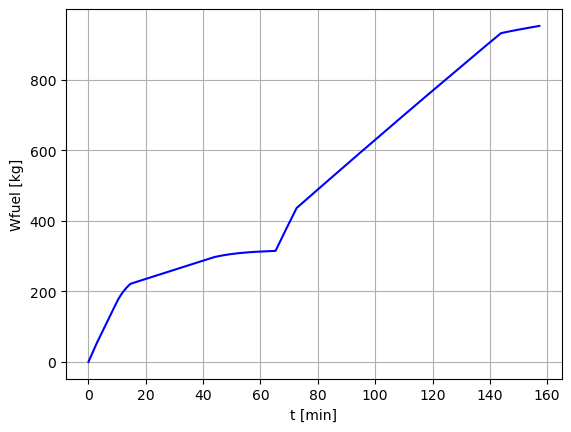

In [ ]:
plt.plot(times/60,Ef/myaircraft.weight.ef, 'b')
#plt.plot(myaircraft.mission.profile.Breaks,np.ones(6)*0.05, '*')
plt.grid(visible=True)
plt.xlabel('t [min]')
plt.ylabel('Wfuel [kg]')
plt.show()

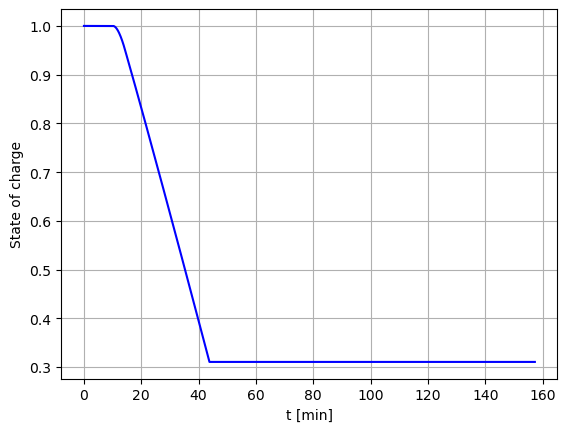

In [ ]:
plt.plot(times/60,soc, 'b')
#plt.plot(myaircraft.mission.profile.Breaks,np.ones(6)*0.05, '*')
plt.grid(visible=True)
plt.xlabel('t [min]')
plt.ylabel('State of charge')
plt.show()

Now run a proper optimization that finds the hybridation strategy the minimizes fuel burn

In [ ]:
def funcOffD(Wf, WPayload):
     #print(f"Trying Wf = {Wf:.6f}")
     run = myaircraft.mission.EvaluateMission(OEW + WPayload+ Wf + wbattery)
     newfuel = run[0]/myaircraft.weight.ef
     if newfuel == 0: 
          print(run[1])
          return np.nan
     result = Wf - newfuel
     #print(f"               -> funcOffD = {result:.6f}")
     return result

def simulate_mission(phi_vec, myaircraft, typical_range):
    """
    Runs the typical-mission performance/energy model.

    Parameters
    ----------
    phi_vec : array_like, shape (4,)
        [phi_TO, phi_CL, phi_CR0, phi_CR1]
    Returns
    -------
    fuel_burn : float         # kg
    soc_end   : float         # [-]
    violated  : bool          # True if any TLAR or power limit fails *during* the mission
    """
    print('simulate mission with phi_vec: ', phi_vec)

    phiTO = phi_vec[0]
    phiCL = phi_vec[1]
    phiCR0 = phi_vec[2]
    phiCR1 = phi_vec[3]

    newmission = pg.Mission.Mission(myaircraft)
    myaircraft.mission = newmission

    newrange = typical_range

    MissionInput = {'Range Mission': newrange,  #nautical miles
                    'Range Diversion': 220,  #nautical miles
                    'Beta start': 0.985,
                    'Payload Weight': 4560,  #Kg
                    'Crew Weight': 500}  #Kg

    MissionStages = {'Takeoff': {'Supplied Power Ratio':{'phi': phiTO}},
                     'Climb1': {'type': 'ConstantRateClimb', 'input': {'CB': 0.12, 'Speed': 77, 'StartAltitude': 100, 'EndAltitude': 1500}, 'Supplied Power Ratio':{'phi_start': 0., 'phi_end':0. }},
                     'Climb2': {'type': 'ConstantRateClimb', 'input': {'CB': 0.06, 'Speed': 110, 'StartAltitude': 1500, 'EndAltitude': 4500}, 'Supplied Power Ratio':{'phi_start': phiCL, 'phi_end':phiCL }},
                     'Climb3': {'type': 'ConstantRateClimb', 'input': {'CB': 0.05, 'Speed': 110, 'StartAltitude': 4500, 'EndAltitude': 6000}, 'Supplied Power Ratio':{'phi_start': phiCL, 'phi_end':phiCL}},
                     'Cruise': {'type': 'ConstantMachCruise', 'input':{ 'Mach': 0.45, 'Altitude': 6000}, 'Supplied Power Ratio':{'phi_start': phiCR0, 'phi_end':phiCR1}},
                     'Descent1': {'type': 'ConstantRateDescent', 'input':{'CB': -0.05, 'Speed': 90, 'StartAltitude': 6000, 'EndAltitude': 200}, 'Supplied Power Ratio':{'phi_start': 0.0, 'phi_end':0.0 }}}

    DiversionStages = {'Climb1': {'type': 'ConstantRateClimb', 'input': {'CB': 0.06, 'Speed': 110, 'StartAltitude': 200, 'EndAltitude': 3100}, 'Supplied Power Ratio':{'phi_start': 0.0, 'phi_end':0.0 }},
                     'Cruise': {'type': 'ConstantMachCruise', 'input':{ 'Mach': 0.2, 'Altitude': 3100}, 'Supplied Power Ratio':{'phi_start': 0.0, 'phi_end':0.0}},
                     'Descent1': {'type': 'ConstantRateDescent', 'input':{'CB': -0.04, 'Speed': 90, 'StartAltitude': 3100, 'EndAltitude': 200}, 'Supplied Power Ratio':{'phi_start': 0.0, 'phi_end':0.0 }}}

    myaircraft.MissionInput = MissionInput
    myaircraft.MissionStages = MissionStages
    myaircraft.DiversionStages = DiversionStages

    myaircraft.mission.InitializeProfile()
    myaircraft.mission.SetInput()
    myaircraft.mission.size_battery_pack = False

    # bracket fuel interval
    N = 50
    Wfs = np.linspace(0, wfuel, N)
    allfuel = []
    for fuelw in Wfs: 
        wf = funcOffD(fuelw, WPayload)
        if np.isnan(wf):
            print 
            break
        allfuel.append(wf)
        if wf > 0: break

    if len(allfuel) < 2:
        print("No valid sub-interval found where the function crosses zero.")
        return 1e10, 0, True
    else:

        brackets = []

        for i in range(len(allfuel) - 1):
            v0 = allfuel[i]
            v1 = allfuel[i + 1]
            if np.isnan(v0) or np.isnan(v1):
                continue
            if v0 * v1 < 0:
                brackets.append((Wfs[i], Wfs[i + 1]))

        if not brackets:
            print("No valid sub-interval found where the function crosses zero.")
            return 1e10, 0, True
        else:
            a, b = brackets[0]
            print(f"Using bracket: [{a}, {b}]") 

    # refine search
    newwfuel=brenth(funcOffD, a, b , args=(WPayload), xtol=0.01)  #newfuel is the fuel on board for the typical mission including diversion
    newbatteryEnergy = myaircraft.mission.EBat[-1]
    newbatteryPower = max(myaircraft.mission.TO_PBat,myaircraft.mission.Max_PBat)

    times = np.array([])
    Ef    = np.array([])
    for array in myaircraft.mission.integral_solution: #or equivalently: newmission.integral_solution
        times = np.concatenate([times, array.t])
        Ef    = np.concatenate([Ef   , array.y[0]])

    soc_end = myaircraft.battery.SOC
    fuel_burn = Ef[np.where(times==myaircraft.mission.profile.Breaks[5])[0][0]]/myaircraft.weight.ef #index 5 corresponds to 6th profile break (end of descent)

    print("Battery energy consumed [%]: ", 100*(newbatteryEnergy/batteryEnergy))

    print("Battery peak power absorption wrt design [%]: ", 100*(newbatteryPower/batteryPower))

    print("Fuel burn: ", fuel_burn)
    print("SOC @ landing: ", soc_end)

    return fuel_burn, soc_end, False





In [ ]:
from scipy.optimize import minimize, NonlinearConstraint, Bounds
# -----------------------------------------------------------
# Inner optimiser wrapper
# -----------------------------------------------------------
def optimise_phi_T(aircraft, typical_range,
                   x0=(0.0, 0.5, 0.2, 0.1),
                   verbose=True):
    """
    Minimises typical-mission fuel burn with SoC and power constraints.

    Returns
    -------
    best_phi  : ndarray, shape (4,)
    best_fuel : float
    """

    soc_min = aircraft.battery.SOC_min

    # ——— objective ——— #
    def obj(phi):
        fuel, soc_end, vio = simulate_mission(phi, aircraft, typical_range)
        if vio:        # TLAR, max-power, current limits inside profile
            return 1e6 # huge penalty; algorithm rarely steps here thanks to constraint below
        return fuel

    # ——— inequality constraint 1: SoC_end ≥ SoC_min ——— #
    def soc_residual(phi):
        fuel, soc_end, *_ = simulate_mission(phi, aircraft, typical_range)
        return soc_end - soc_min      # ≥ 0 feasible

    soc_con = NonlinearConstraint(soc_residual, 0.0, np.inf)

    # ——— inequality constraint 2:  0 ≤ φ ≤ 1  (built-in bounds) ——— #
    bnds = Bounds([0.0, 0.0, 0.0, 0.0],
                  [1.0, 1.0, 1.0, 1.0])

    # ——— optimiser call ——— #
    res = minimize(obj, x0, method='trust-constr',
                   constraints=[soc_con],
                   bounds=bnds,
                   options=dict(verbose=3 if verbose else 0,
                                maxiter=200))

    if not res.success:
        raise RuntimeError(f"Inner optimiser failed: {res.message}")

    best_phi  = res.x
    best_fuel = res.fun
    return best_phi, best_fuel

In [151]:
import cma

def optimise_phi_T_cma(aircraft, typical_range,
                   x0guess=(0.0, 0.3, 0.2, 0.1)):

    soc_min = aircraft.battery.SOC_min

    def obj(phi):
        fuel, soc_end, vio = simulate_mission(phi, aircraft, typical_range)
        penalty = 0.0
        if soc_end < soc_min:
            penalty += 1e4 * (soc_min - soc_end)**2
        if vio:
            penalty += 1e4
        return fuel + penalty

    # CMA works best with variables in [0,1], so bounds are enforced by penalty
    def clip_phi(phi):
        return np.clip(phi, 0.0, 1.0)

    x0 = np.array(x0guess)   # reasonable guess
    sigma0 = 0.2                          # initial search radius

    es = cma.CMAEvolutionStrategy(x0, sigma0, {
        'bounds': [0.0, 1.0],
        'popsize': 6,         # small population, faster per generation
        'maxiter': 50,        # ~50 generations is usually enough
        'verb_disp': 1,
    })

    while not es.stop():
        candidates = es.ask()
        fitness = [obj(clip_phi(c)) for c in candidates]
        es.tell(candidates, fitness)

    result_phi = clip_phi(es.result.xbest)
    result_fuel = obj(result_phi)
    print('Best phi:', result_phi)
    print('Fuel burn:', result_fuel)
    return result_phi, result_fuel

In [152]:
typical_range = 250
#optimise_phi_T(myaircraft, typical_range,
#                   x0=(0.0, 0.2, 0.2, 0.1),
#                   verbose=True)
optimise_phi_T_cma(myaircraft, typical_range)

(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 4 (seed=935155, Mon Jul  7 13:13:30 2025)
simulate mission with phi_vec:  [0.14954745 0.54133561 0.10643904 0.15076045]
Fail_Condition_6
Cell voltage outside of allowed range:
Voltage:-1.5452287865574839 Range: 2.5 ~ 4.2
Pnum is 47
VOLTAGE_OUTSIDE_LIMITS
No valid sub-interval found where the function crosses zero.
simulate mission with phi_vec:  [0.04995709 0.46110952 0.45087376 0.15943921]
Fail_Condition_1
SOC outside of allowed range:
SOC:0.16736282399409852 Range: 0.20000000000000001 ~ 1.00000000000000000
SOC_OUTSIDE_LIMITS
No valid sub-interval found where the function crosses zero.
simulate mission with phi_vec:  [2.52455599e-05 6.52811334e-01 2.21747050e-02 1.59270362e-01]
Fail_Condition_6
Cell voltage outside of allowed range:
Voltage:2.473433348392101 Range: 2.5 ~ 4.2
Pnum is 47
VOLTAGE_OUTSIDE_LIMITS
No valid sub-interval found where the function crosses zero.
simulate mission with phi_vec:  [0.1441625  0.07596513 0.29526436 0.28

(array([0.61082442, 0.16076254, 0.35789979, 0.14402597]), 293.6368911758388)

In [153]:
simulate_mission([0.61082442, 0.16076254, 0.35789979, 0.14402597], myaircraft, typical_range)

simulate mission with phi_vec:  [0.61082442, 0.16076254, 0.35789979, 0.14402597]
Using bracket: [900.5158238155083, 938.0373164744877]
Battery energy consumed [%]:  73.53563045242355
Battery peak power absorption wrt design [%]:  213.79092038203584
Fuel burn:  293.6371189711391
SOC @ landing:  0.2524989056615484


(293.6371189711391, 0.2524989056615484, False)